In [55]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import os
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#make pandas show all data without "..."
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = round(roc_auc, 3)

    return roc_auc_dict

In [4]:
def accuracy(y_true, y_pred):
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [144]:
data_dir = r'C:\Users\user\OneDrive\Documents\2022_autumn_Data_mining\Final project'
train_data = os.path.join(data_dir , 'all_feature_extended.csv')
train_data_raw = pd.read_csv('all_feature_extended_test.csv', encoding='unicode_escape')
training_data = pd.read_csv('all_feature_extended.csv', encoding='unicode_escape')
#training_data_log = pd.read_csv('all_feature_extended_log.csv', encoding='unicode_escape')
train_data_raw.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid,course_title_len,price_disc,num_subscribers_disc,num_reviews_disc,num_lectures_disc,rating_disc
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2/14/2013,Free,36,0,3,3,2,3
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,6/9/2013,Free,30,0,3,3,3,2
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,11/2/2015,Paid,26,3,3,3,2,3
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,4/8/2014,Free,54,0,3,3,3,3
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,3/8/2016,Paid,37,3,3,3,3,2


In [6]:
# for tag in training_data.columns[-5:]:
#     print(training_data[tag].value_counts())
# print(training_data['num_reviews'].quantile([0.25,0.5,0.75]))
# x = list(range(training_data.shape[0]))
# y = list(training_data['num_reviews'])
# plt.scatter(x,y)
# plt.show()

1. Rating value
2. Categorize rating range
3. Popularity (number of subscribers)
4. Practicality (number of reviewers)

In [109]:
train_data1 = pd.concat([training_data['price'], training_data['subject'], training_data['level'], training_data['content_duration']
                        , training_data['num_lectures'], training_data['course_title_len']
                         ], axis = 1)
train_data_dum = pd.get_dummies(train_data1) 
print(train_data_dum.shape)
train_data_dum.head()

(3462, 12)


,price,content_duration,num_lectures,course_title_len,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level
0,0,10.5,45,36,0,0,0,1,0,1,0,0
1,0,3.5,27,30,0,0,0,1,0,0,1,0
2,200,43.0,342,26,0,0,0,1,0,1,0,0
3,0,3.0,30,54,0,0,0,1,1,0,0,0
4,200,30.5,304,37,0,0,0,1,0,1,0,0


### traing data

In [110]:
x_train, x_vali, y_train, y_vali =train_test_split(train_data_dum, training_data['rating_disc'], 
                                                   test_size=0.3, random_state=42)

### SVM

f1 score: 0.309
accuracy: 0.5005
confusion_matrix:


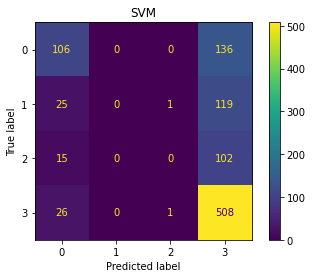

In [139]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(x_train, y_train)

y_predict_svm = svm.predict(x_vali)

f1_result_svm = f1_score(y_vali, y_predict_svm, average='macro')
print('f1 score: ', end = '')
print(format(f1_result_svm,  '.3f'))

accu_svm = accuracy(y_vali, y_predict)
print('accuracy: ', end = '')
print(format(accu_svm,  '.4f'))

print('confusion_matrix:')
confusion_matrix_svm = confusion_matrix(y_vali, y_predict_svm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm)
cm_display.plot()
plt.title('SVM')
plt.show()

### Random forest test

f1 score: 0.310
accuracy: 0.5910
confusion_matrix:


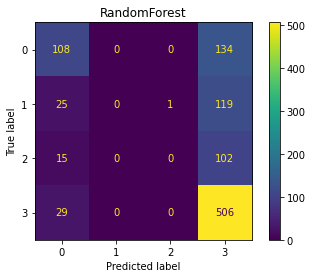

In [140]:
testForestModel = RandomForestClassifier(bootstrap = True, 
                                 max_depth=10, 
                                 max_features='sqrt', 
                                 min_samples_leaf=2, 
                                 min_samples_split=5,
                                 n_estimators=200)
testForestModel.fit(x_train, y_train)

y_predict_ran = testForestModel.predict(x_vali)

f1_result_ran = f1_score(y_vali, y_predict_ran, average='macro')
print('f1 score: ', end = '')
print(format(f1_result_ran,  '.3f'))

accu_ran = accuracy(y_vali, y_predict_ran)
print('accuracy: ', end = '')
print(format(accu_ran,  '.4f'))

print('confusion_matrix:')
confusion_matrix_ran = confusion_matrix(y_vali, y_predict_ran)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ran)
cm_display.plot()
plt.title('RandomForest')
plt.show()

### XGboost

f1 score: 0.311
accuracy: 0.5717
confusion_matrix:


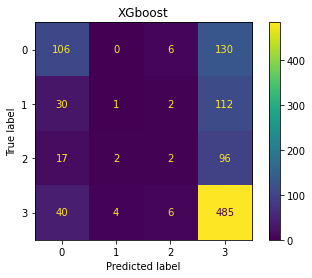

In [141]:
xg5 = XGBClassifier(colsample_bytree= 0.3, learning_rate=0.01, max_depth= 40, n_estimators=800)
xg5=xg5.fit(x_train, y_train)
y_predict_xg = xg5.predict(x_vali)

f1_result_xg = f1_score(y_vali, y_predict_xg, average='macro')
print('f1 score: ', end = '')
print(format(f1_result_xg,  '.3f'))

accu_xg = accuracy(y_vali, y_predict_xg)
print('accuracy: ', end = '')
print(format(accu_xg,  '.4f'))

print('confusion_matrix:')
confusion_matrix_xg = confusion_matrix(y_vali, y_predict_xg)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xg)
cm_display.plot()
plt.title('XGboost')
plt.show()

In [123]:
print("roc_auc_score in XGboost: ", end = '')
print(roc_auc_score_multiclass(y_vali, y_predict_xg))
print("roc_auc_score in SVM: ", end = '')
print(roc_auc_score_multiclass(y_vali, y_predict_svm))
print("roc_auc_score in RandomForest: ", end = '')
print(roc_auc_score_multiclass(y_vali, y_predict_ran))

roc_auc_score in XGboost: {0: 0.664, 1: 0.5, 2: 0.501, 3: 0.618}
roc_auc_score in SVM: {0: 0.678, 1: 0.5, 2: 0.499, 3: 0.621}
roc_auc_score in RandomForest: {0: 0.683, 1: 0.5, 2: 0.504, 3: 0.625}
